In [1]:
#Importing all the import statements.
%matplotlib inline
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
#Retrieving data from SQL
def get_data_from_SQL():
    conn = sqlite3.connect('index.sqlite') #Connection to the SQLite database.
    cur = conn.cursor() #Using the cursor for the connection.

    #Select statement to retrieve the data and declaring the lists.
    cur.execute('''SELECT id, station_name, total_docks, available_docks, available_bikes, status, record, timestamp, docks_in_service FROM BikeStation''')
    stnid = list()
    stname = list()
    tdocks = list()
    avdocks = list()
    avbikes = list()
    stats = list()
    recrd = list()
    tmstmp = list()
    dcks_in_serv = list()
    date = list()
    day_of_week = list()
    dcks_in_serv = list()
    days = {0: "Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"}

    #Passing the data to lists.
    for x in cur:
        id_num = x[0]
        name_stat = x[1]
        tot_doc= x[2]
        av_doc = x[3]
        av_bikes = x[4]
        sts = x[5]
        rec = x[6]
        timest = x[7]
        dcks_serv = x[8]
        
        stnid.append(id_num)
        stname.append(name_stat)
        tdocks.append(tot_doc)
        avdocks.append(av_doc)
        avbikes.append(av_bikes)
        stats.append(sts)
        recrd.append(rec)
        dcks_in_serv.append(dcks_serv)

        #Converting the datetime to isoformat and splitting the datetime to date and day of the week.
        timestamp=datetime.datetime.fromisoformat(timest)
        tmstmp.append(timestamp)
        date.append(timestamp.date())
        day_of_week.append(days[timestamp.weekday()])
        
    return stnid, stname, tdocks, avdocks, avbikes, stats, recrd, tmstmp, dcks_in_serv, date, day_of_week

In [3]:
stnid, stname, tdocks, avdocks, avbikes, stats, recrd, tmstmp, dcks_in_serv, date, day_of_week = get_data_from_SQL()
#Converting the list of bikestation objects to Panda's DataFrame.
bike_df = pd.DataFrame({"id":stnid, "name":stname, "tdocks":tdocks, "avdocks":avdocks, "avbikes":avbikes, "stats":stats, "recrd":recrd, "tmstmp":tmstmp, "date":date, "dcks_in_serv":dcks_in_serv, "day_of_week":day_of_week})
bike_df.head()  #Printing the pivot table.

,id,name,tdocks,avdocks,avbikes,stats,recrd,tmstmp,date,dcks_in_serv,day_of_week
0,20,Sheffield Ave & Kingsbury St,15,13,1,In Service,2020210926235520,2021-09-26 23:55:20,2021-09-26,14,Sat
1,20,Sheffield Ave & Kingsbury St,15,13,1,In Service,2020210926234520,2021-09-26 23:45:20,2021-09-26,14,Sat
2,20,Sheffield Ave & Kingsbury St,15,13,1,In Service,2020210926233520,2021-09-26 23:35:20,2021-09-26,14,Sat
3,20,Sheffield Ave & Kingsbury St,15,13,1,In Service,2020210926232515,2021-09-26 23:25:15,2021-09-26,14,Sat
4,20,Sheffield Ave & Kingsbury St,15,13,1,In Service,2020210926231505,2021-09-26 23:15:05,2021-09-26,14,Sat


In [5]:
#Performing statistical analysis
stations = [20,93,223,307,666]
for x in stations:
    station_df = bike_df[bike_df["id"] == x]
    print("For Station:"+str(x)+" the number of average bikes available are", np.mean(station_df['avbikes']))
    print("For Station:"+str(x)+" the number of docks in service are", np.mean(station_df['dcks_in_serv']))
    print("")

For Station:20 the number of average bikes available are 3.104
For Station:20 the number of docks in service are 14.0068

For Station:93 the number of average bikes available are 5.3714
For Station:93 the number of docks in service are 14.3294

For Station:223 the number of average bikes available are 6.2886
For Station:223 the number of docks in service are 14.1846

For Station:307 the number of average bikes available are 6.4118
For Station:307 the number of docks in service are 14.4286

For Station:666 the number of average bikes available are 3.748
For Station:666 the number of docks in service are 14.7954



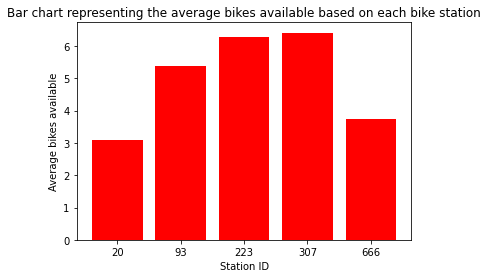

<Figure size 432x288 with 0 Axes>

In [27]:
# Plotting a bar chart representing average bikes for each station.
avg_bikes_available = []
for x in stations:
    station_df = bike_df[bike_df["id"] == x]
    avg_bikes_available.append(np.average(station_df['avbikes']))
    plt.bar(str(x), np.average(station_df['avbikes']), color ='red')

plt.title('Bar chart representing the average bikes available based on each bike station')
plt.xlabel('Station ID')
plt.ylabel('Average bikes available')
plt.show()

plt.savefig('Plot1.png')

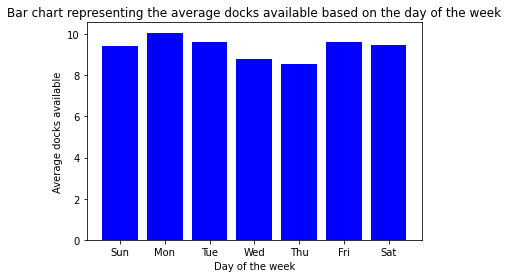

<Figure size 432x288 with 0 Axes>

In [23]:
#Plotting a bar chart representing average docks based on day of the week.
days = ['Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
avg_docks_available = []
for y in days:
    station_df = bike_df[bike_df["day_of_week"] == y]
    avg_docks_available.append(np.average(station_df['avdocks']))

plt.bar(days, avg_docks_available, color='blue')
plt.title('Bar chart representing the average docks available based on the day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Average docks available')
plt.show()

plt.savefig('Plot2.png')

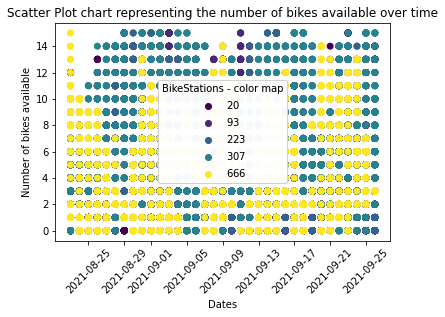

In [22]:
#SCatter plot representing the number of bikes available over time.
fig, ax = plt.subplots() #To create a subplot to be used as an extra feature.
scatter = ax.scatter(bike_df['date'], bike_df['avbikes'], c=bike_df['id'],
            label=bike_df['id'])

#New feature that helps us to understand the details of chart colors and this helps in the readability.
lgd = ax.legend(*scatter.legend_elements(),
                    loc="center", title="BikeStations - color map")
ax.add_artist(lgd)
plt.xticks(rotation=45)
plt.title('Scatter Plot chart representing the number of bikes available over time')
plt.xlabel('Dates') 
plt.ylabel('Number of bikes available')

plt.savefig('Plot3.png')